In [1]:
# Simple CNN model for CIFAR-10
import numpy
import pandas

import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

from keras import backend as K
K.common.set_image_dim_ordering('th')

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [6]:
num_classes

10

In [7]:
# Create the model
model = Sequential() #Sequential Neural Network
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3))) #Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function
model.add(Dropout(0.2)) #Dropout layer at 20%
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3))) #Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function
model.add(MaxPooling2D(pool_size=(2, 2))) #Max Pool layer with size 2×2
model.add(Flatten()) #Flatten layer
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3))) #Fully connected layer with 512 units and a rectifier activation function
model.add(Dropout(0.5)) #Dropout layer at 50%
model.add(Dense(num_classes, activation='softmax')) #Fully connected output layer with 10 units and a Softmax activation function, here num_classes value is 10

In [8]:
# Compile model
epochs = 3
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) #Compiling the Model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

In [9]:
# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 225s 4ms/step - loss: 1.7476 - accuracy: 0.3708 - val_loss: 1.4524 - val_accuracy: 0.4803
Epoch 2/3
50000/50000 [==============================] - 222s 4ms/step - loss: 1.4523 - accuracy: 0.4809 - val_loss: 1.3609 - val_accuracy: 0.5222
Epoch 3/3
50000/50000 [==============================] - 224s 4ms/step - loss: 1.3682 - accuracy: 0.5115 - val_loss: 1.2987 - val_accuracy: 0.5421


In [10]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy Before adding layers: %.2f%%" % (scores[1]*100))#Accuracy & loss evaluation

Accuracy Before adding layers: 54.21%


In [11]:
model.save('./model' + '.h5') #Saving the model to .h5

# 1. Follow the instruction below and then report how the performance changed.(apply all at once)
•	Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.

•	Dropout layer at 20%.

•	Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.

•	Max Pool layer with size 2×2.

•	Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.

•	Dropout layer at 20%.

•	Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.

•	Max Pool layer with size 2×2.

•	Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.

•	Dropout layer at 20%.

•	Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.

•	Max Pool layer with size 2×2.

•	Flatten layer.

•	Dropout layer at 20%.

•	Fully connected layer with 1024 units and a rectifier activation function.

•	Dropout layer at 20%.

•	Fully connected layer with 512 units and a rectifier activation function.

•	Dropout layer at 20%.

•	Fully connected output layer with 10 units and a Softmax activation function

In [12]:
# Create the model
model1 = Sequential() #Sequential Neural Network
model1.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3))) #Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function
model1.add(Dropout(0.2)) #Dropout layer at 20%
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3))) #Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function
model1.add(MaxPooling2D(pool_size=(2, 2))) #Max Pool layer with size 2×2
model1.add(Conv2D(64, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3))) #Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function
model1.add(Dropout(0.2)) #Dropout layer at 20%
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3))) #Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function
model1.add(MaxPooling2D(pool_size=(2, 2))) #Max Pool layer with size 2×2
model1.add(Conv2D(128, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3))) #Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function
model1.add(Dropout(0.2)) #Dropout layer at 20%
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3))) #Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function
model1.add(MaxPooling2D(pool_size=(2, 2))) #Max Pool layer with size 2×2
model1.add(Flatten()) #Flatten layer
model1.add(Dropout(0.2)) #Dropout layer at 20%
model1.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3))) #Fully connected layer with 1024 units and a rectifier activation function
model1.add(Dropout(0.2)) #Dropout layer at 20%
model1.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3))) #Fully connected layer with 512 units and a rectifier activation function
model1.add(Dropout(0.2)) #Dropout layer at 20%
model1.add(Dense(num_classes, activation='softmax')) #Fully connected output layer with 10 units and a Softmax activation function

In [13]:
# Compile model
epochs = 3
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) #Compiling
print(model1.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)       

In [14]:
# Fit the model
history1=model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 478s 10ms/step - loss: 1.9290 - accuracy: 0.2884 - val_loss: 1.6641 - val_accuracy: 0.3999
Epoch 2/3
50000/50000 [==============================] - 479s 10ms/step - loss: 1.5804 - accuracy: 0.4191 - val_loss: 1.4882 - val_accuracy: 0.4604
Epoch 3/3
50000/50000 [==============================] - 485s 10ms/step - loss: 1.4547 - accuracy: 0.4684 - val_loss: 1.3855 - val_accuracy: 0.5047


In [15]:
# Final evaluation of the model
scores1 = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores1[1]*100))

Accuracy: 50.47%


# Did the performance change?

In [16]:
print("Accuracy Before adding layers: %.2f%%" % (scores[1]*100))
print("Accuracy after adding layers: %.2f%%" % (scores1[1]*100))

Accuracy Before adding layers: 54.21%
Accuracy after adding layers: 50.47%


# 2. predict the first 4 image of the test data. Then, print the actual label for those 4 images (label means the probability associated with them) to check if the model predicted correctly or not

In [17]:
import pandas as pd
prediction = pd.DataFrame()
imageid = []
for i in range(len(X_test[0:4])):
    i = i + 1
    imageid.append(i)
prediction["ImageId"] = imageid
prediction["Label"] = model.predict_classes(X_test[0:4], verbose=0)
print(prediction.head())

import numpy as np
a  = np.array(y_test[0:4])
print('Actual labels for four images: {0}'.format(np.argmax(a, axis=1)))

   ImageId  Label
0        1      3
1        2      1
2        3      8
3        4      8
Actual labels for four images: [3 8 8 0]


# Visualize Loss and Accuracy using the history object

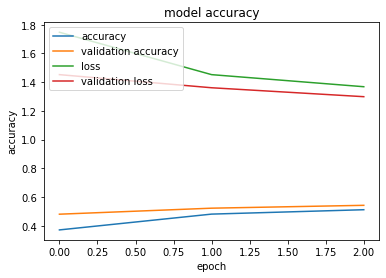

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy','loss','validation loss'], loc='upper left')
plt.show()

# Bonus Question
Program the question 2 using the saved model (.h5 model)


In [19]:
loaded_model = keras.models.load_model('./model.h5')
import pandas as pd
prediction = pd.DataFrame()
imageid = []
for i in range(len(X_test[0:4])):
    i = i + 1
    imageid.append(i)
prediction["ImageId"] = imageid
prediction["Label"] = loaded_model.predict_classes(X_test[0:4], verbose=0)
print(prediction.head())

import numpy as np
a  = np.array(y_test[0:4])
print('Actual labels for first four images: {0}'.format(np.argmax(a, axis=1)))

   ImageId  Label
0        1      3
1        2      1
2        3      8
3        4      8
Actual labels for first four images: [3 8 8 0]
